# Chapter 2

In [65]:
import pandas as pd
# from IPython.display import display

import seaborn as sns
sns.set_theme(style="ticks")

from plotly.offline import iplot, init_notebook_mode
import plotly_express as ple
init_notebook_mode()

from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

## Conceptual

### 1. 第一题

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size $n$ is extremely large, and the number of predic-tors $p$ is small.

> 好。适合用一个flexible的方法

(b) The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

> 不好。适合一个inflexible的方法。

(c) The relationship between the predictors and response is highly non-linear.

> 好。适合flexible的方法

(d) The variance of the error terms, i.e. $\sigma ^ 2=Var(\epsilon)$, is extremely high.

> 不好。适合替换一个flexible的方法。

### 2. 第二题

Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide $n$ and $p$.

(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

> 一个回归问题，比较在意的是解释模型而不是预测模型。

(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price,and ten other variables.

> 分类问题。比较在意预测。

(c) We are interesting in predicting the % change in the US dollar inrelation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market,the % change in the British market, and the % change in the German market.

> 回归问题。预测。


### 3. 第三题

We now revisit the bias-variance decomposition.

(a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

> squared bias：会越来越小
>
> variance: 越来越大
>
> training error: 越来越小
> 
> test error: 先变小再变大
> 
> 贝叶斯错误曲线： 直线

(b) Explain why each of the five curves has the shape displayed inpart (a).




### 4. 第四题

You will now think of some real-life applications for statistical learning.

(a) Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

> 1. 识别数字：图片像素
> 2. 判断一个零件是否有问题：零件形状、质量、表面张力
> 3. 判断用户是否明天会流失：登录天数、今日PV、有没有参与每日活动

(b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain youranswer.

> 1. 预测房价：房子的地理位置、与最近学校的距离，与最近医院的距离
> 2. 预测明日公司收益：过去收益时间序列
> 3. 衡量公司运营状况的最关键因素：收益、员工数量、与外界公司对接数

(c) Describe three real-life applications in which cluster analysis might be useful.

> 1. 区分国家发展等级
> 2. 区分用户质量
> 3. 区分

## Applied

### 8. College数据集

This exercise relates to the `College` data set, which can be found inthe file `College.csv`. It contains a number of variables for 777 different universities and colleges in the US. The variables are

- `Private`: Public/private indicator
- `Apps`: Number of applications received
- `Accept`: Number of applicants accepted
- `Enroll`: Number of new students enrolled
- `Top10perc`: New students from top 10 % of high school class
- `Top25perc`: New students from top 25 % of high school class
- `F.Undergrad`: Number of full-time undergraduates
- `P.Undergrad`: Number of part-time undergraduates
- `Outstate`: Out-of-state tuition
- `Room.Board`: Room and board costs
- `Books`: Estimated book costs
- `Personal`: Estimated personal spending
- `PhD`: Percent of faculty with Ph.D.’s
- `Terminal`: Percent of faculty with terminal degree
- `S.F.Ratio`: Student/faculty ratio
- `perc.alumni`: Percent of alumni who donate
- `Expend`: Instructional expenditure per student
- `Grad.Rate`: Graduation rate

Before reading the data into `R`, it can be viewed in Excel or a text editor.

(a) Use the `read.csv()` function to read the data into `R`. Call the loaded data `college`. Make sure that you have the directory setto the correct location for the data.


In [4]:
college = pd.read_csv("datasets/College.csv")

(b) Look at the data using the `fix()` function. You should notice that the first column is just the name of each university. We don’t really want `R` to treat this as data. However, it may be handy to have these names for later. Try the following commands:

```r
> rownames(college)=college[,1]
> fix(college)
```

In [5]:
college.index = college.iloc[:, 0]
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 121.4+ KB


You should see that there is now a `row.names` column with the name of each university recorded. This means that `R` has given each row a name corresponding to the appropriate university. `R` will not try to perform calculations on the row names. However, we still need to eliminate the first column in the data where thenames are stored. Try

```r
> college=college[,-1]
> fix(college)
```


In [6]:
college = college.iloc[:, 1:]
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


Now you should see that the first data column is `Private`. Note that another column labeled `row.names` now appears before the `Private` column. However, this is not a data column but rather the name that `R` is giving to each row.

(c)   

i. Use the `summary()` function to produce a numerical summary of the variables in the data set.

In [7]:
college.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

ii. Use the `pairs()` function to produce a scatterplot matrix of the first ten columns or variables of the data. Recall that you can reference the first ten columns of a matrix `A` using `A[,1:10]`.

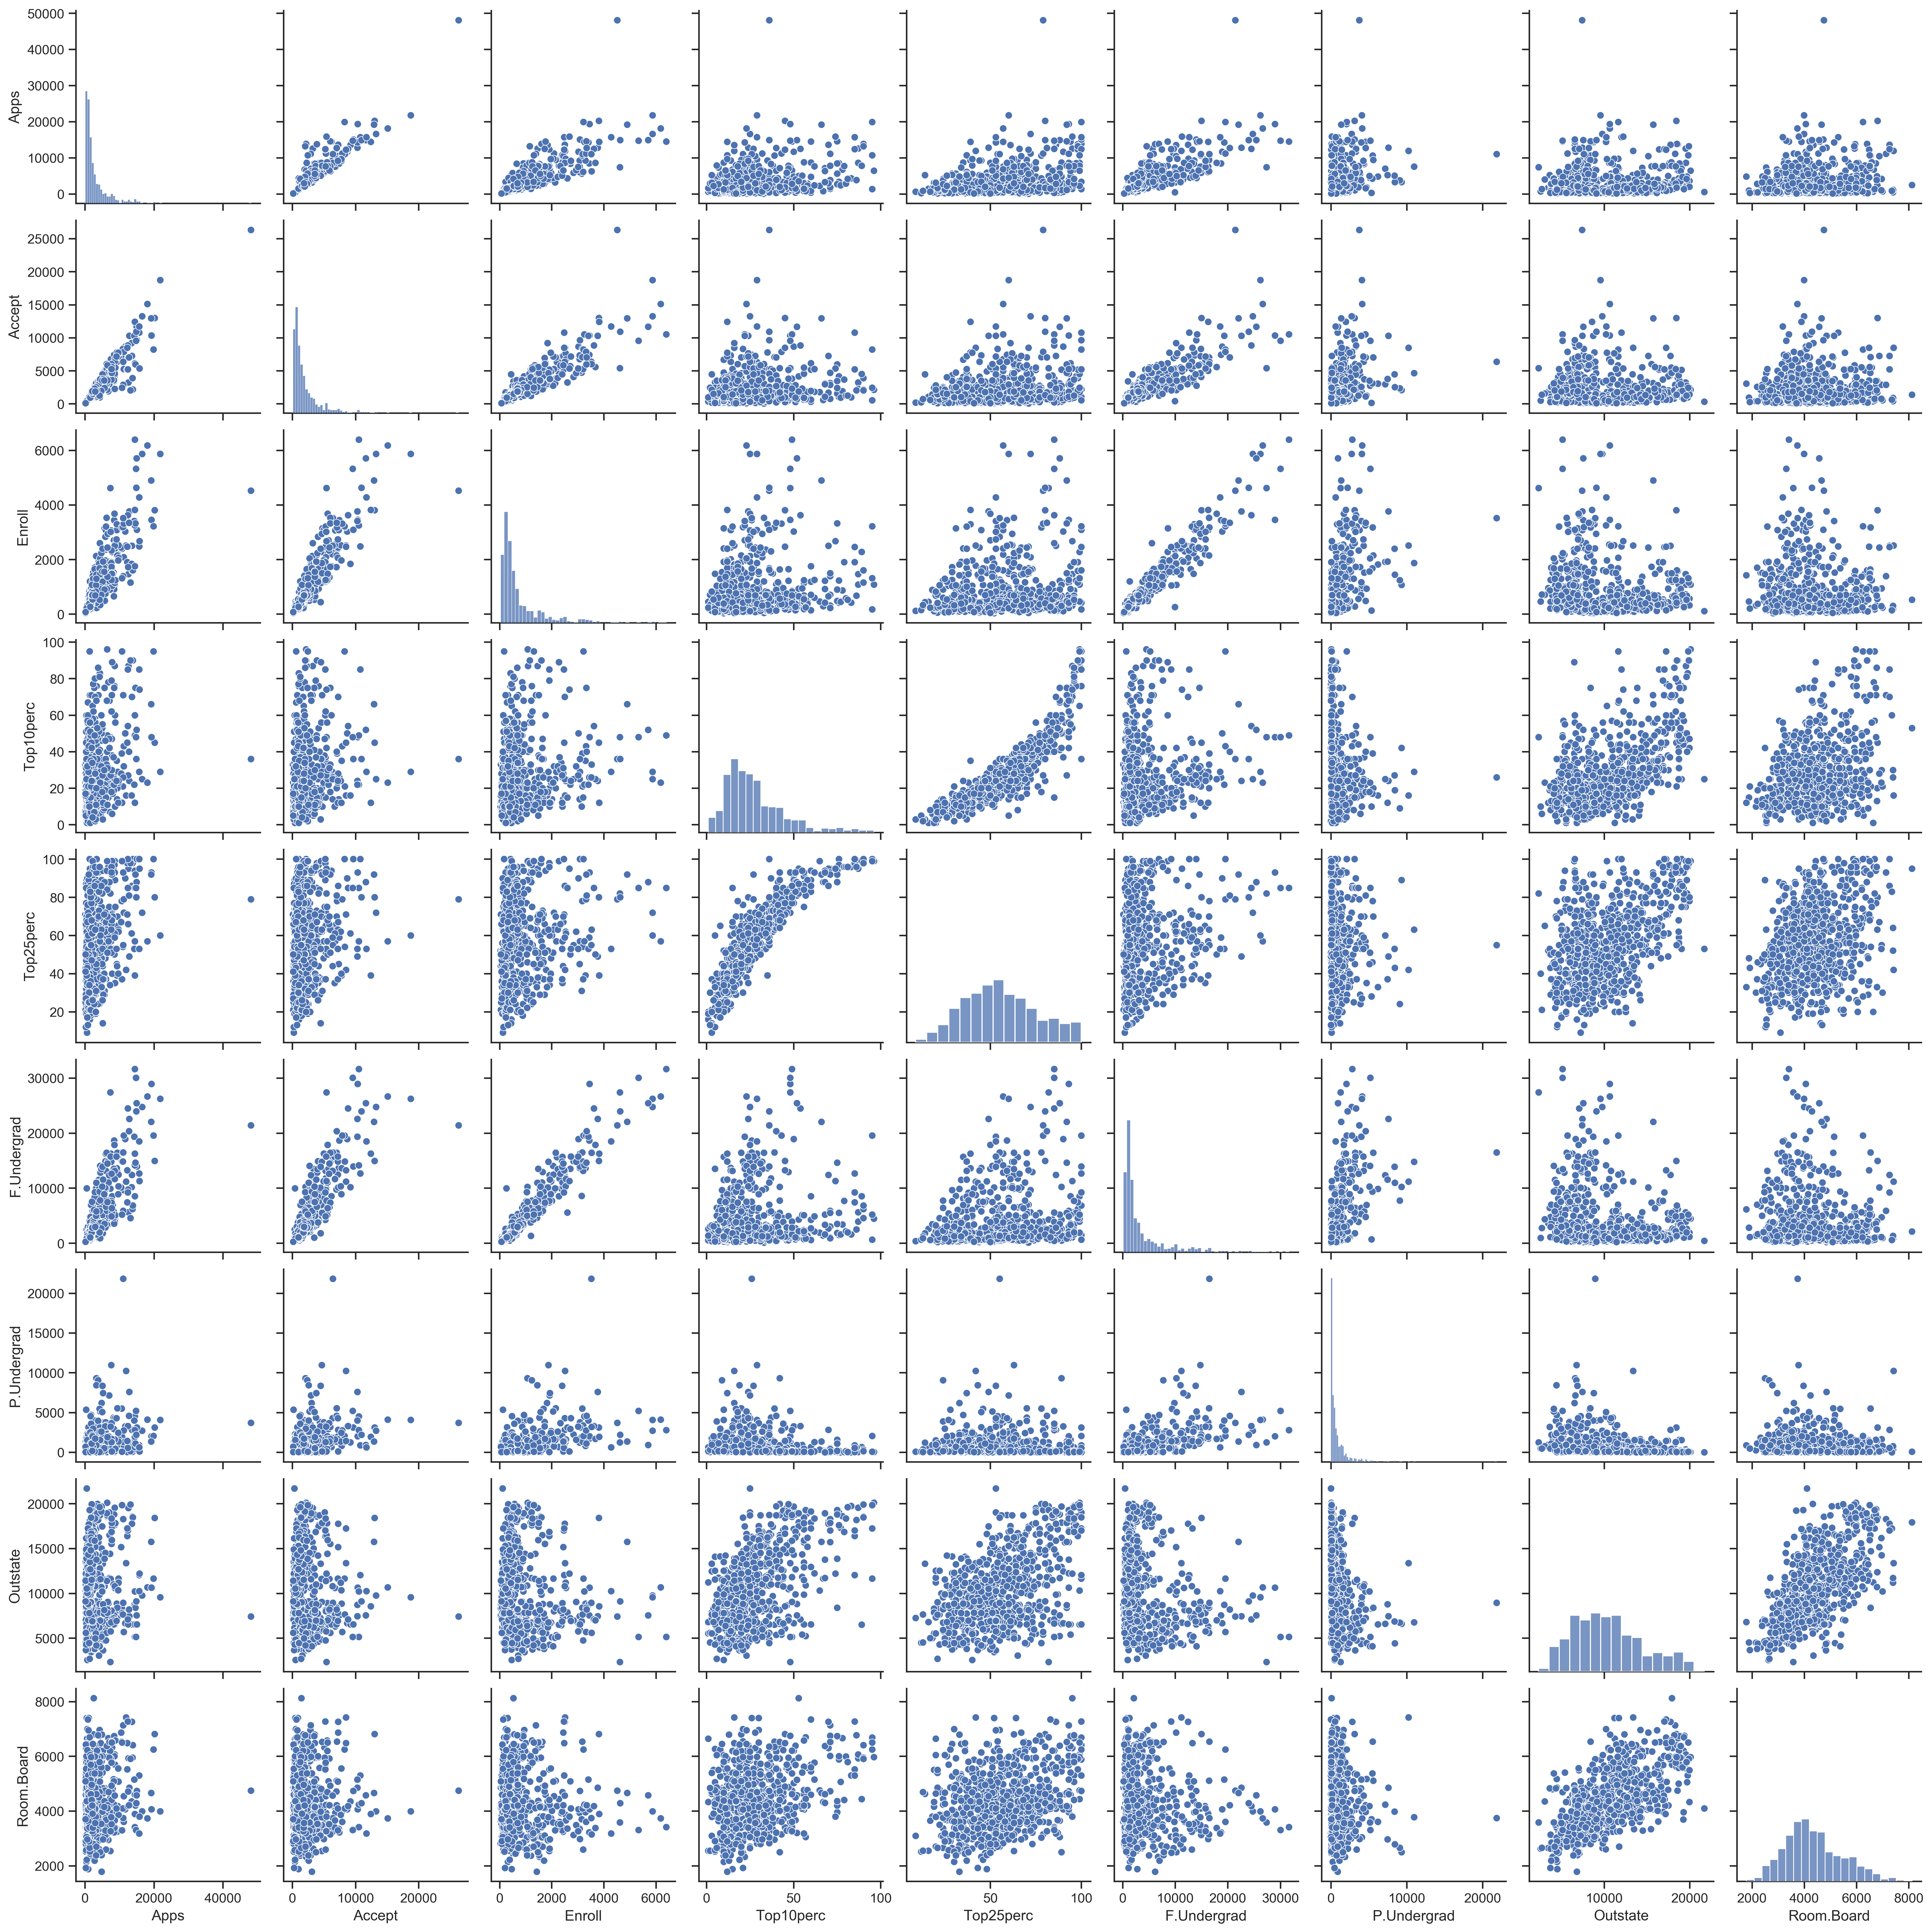

In [64]:
sns.pairplot(college.iloc[:, :10])

In [27]:
ple.scatter_matrix(college.iloc[:, :10])

iii. Use the `plot()` function to produce side-by-side boxplots of `Outstate` versus `Private`.

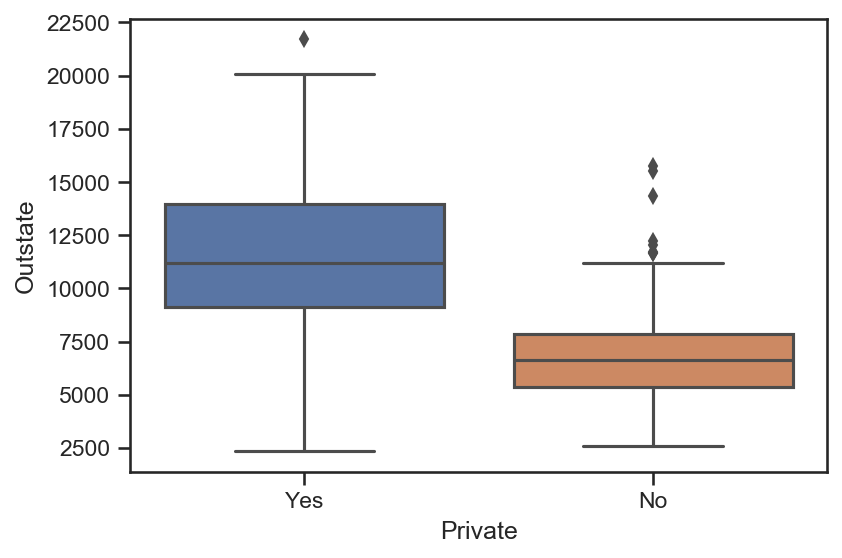

In [66]:
sns.boxplot(
    data=college[["Outstate", "Private"]],
    x="Private",
    y="Outstate",
    )

In [15]:
ple.box(
    college[["Outstate", "Private"]],
    x="Private",
    y="Outstate",
    color="Private"
)

iv. Create a new qualitative variable, called `Elite`, by *binning* the `Top10perc` variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10 % of their high school classes exceeds 50 %.

```r
> Elite=rep("No",nrow(college))
> Elite[college$Top10perc >50]="Yes"
> Elite=as.factor(Elite)
> college=data.frame(college ,Elite)
```

Use the `summary()` function to see how many elite universities there are. Now use the `plot()` function to produces ide-by-side boxplots of `Outstate` versus `Elite`.

In [28]:
Elite = college["Top10perc"].apply(lambda x: "Yes" if x > 50 else "No").astype("category")
college.insert(len(college.columns), "Elite", Elite)
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 19 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
Elite          777 non-null category
dtypes: category(1), float64(1), int64(16), object(1)
memory usage: 136.2+ KB


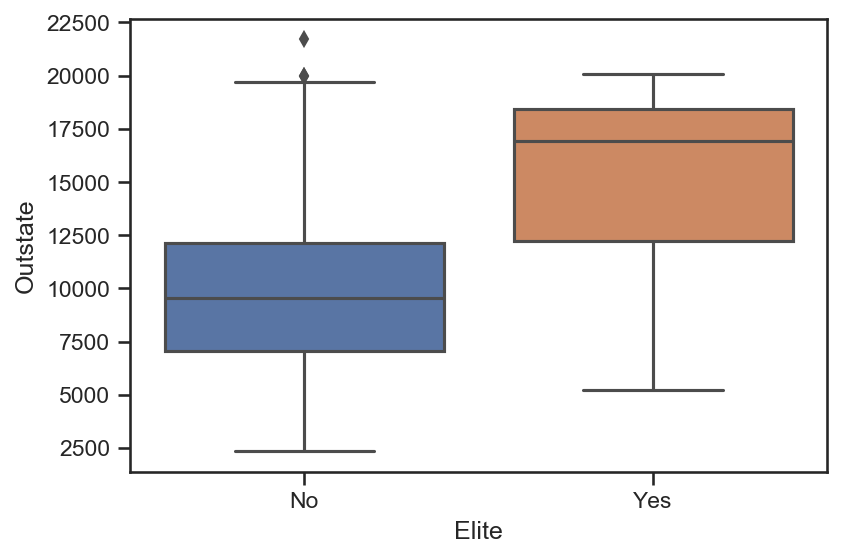

In [67]:
sns.boxplot(
    data=college[["Outstate", "Elite"]],
    x="Elite",
    y="Outstate",
    )

In [33]:
ple.box(
    college[["Outstate", "Elite"]],
    x="Elite",
    y="Outstate",
    color="Elite"
)

v. Use the `hist()` function to produce some histograms with differing numbers of bins for a few of the quantitative variables. You may find the command `par(mfrow=c(2,2))` useful: it will divide the print window into four regions so that fourplots can be made simultaneously. Modifying the argumentsto this function will divide the screen in other ways.

variable   value
0           Apps  1660.0
1           Apps  2186.0
2           Apps  1428.0
3           Apps   417.0
4           Apps   193.0
...          ...     ...
13204  Grad.Rate    40.0
13205  Grad.Rate    83.0
13206  Grad.Rate    49.0
13207  Grad.Rate    99.0
13208  Grad.Rate    99.0

[13209 rows x 2 columns]

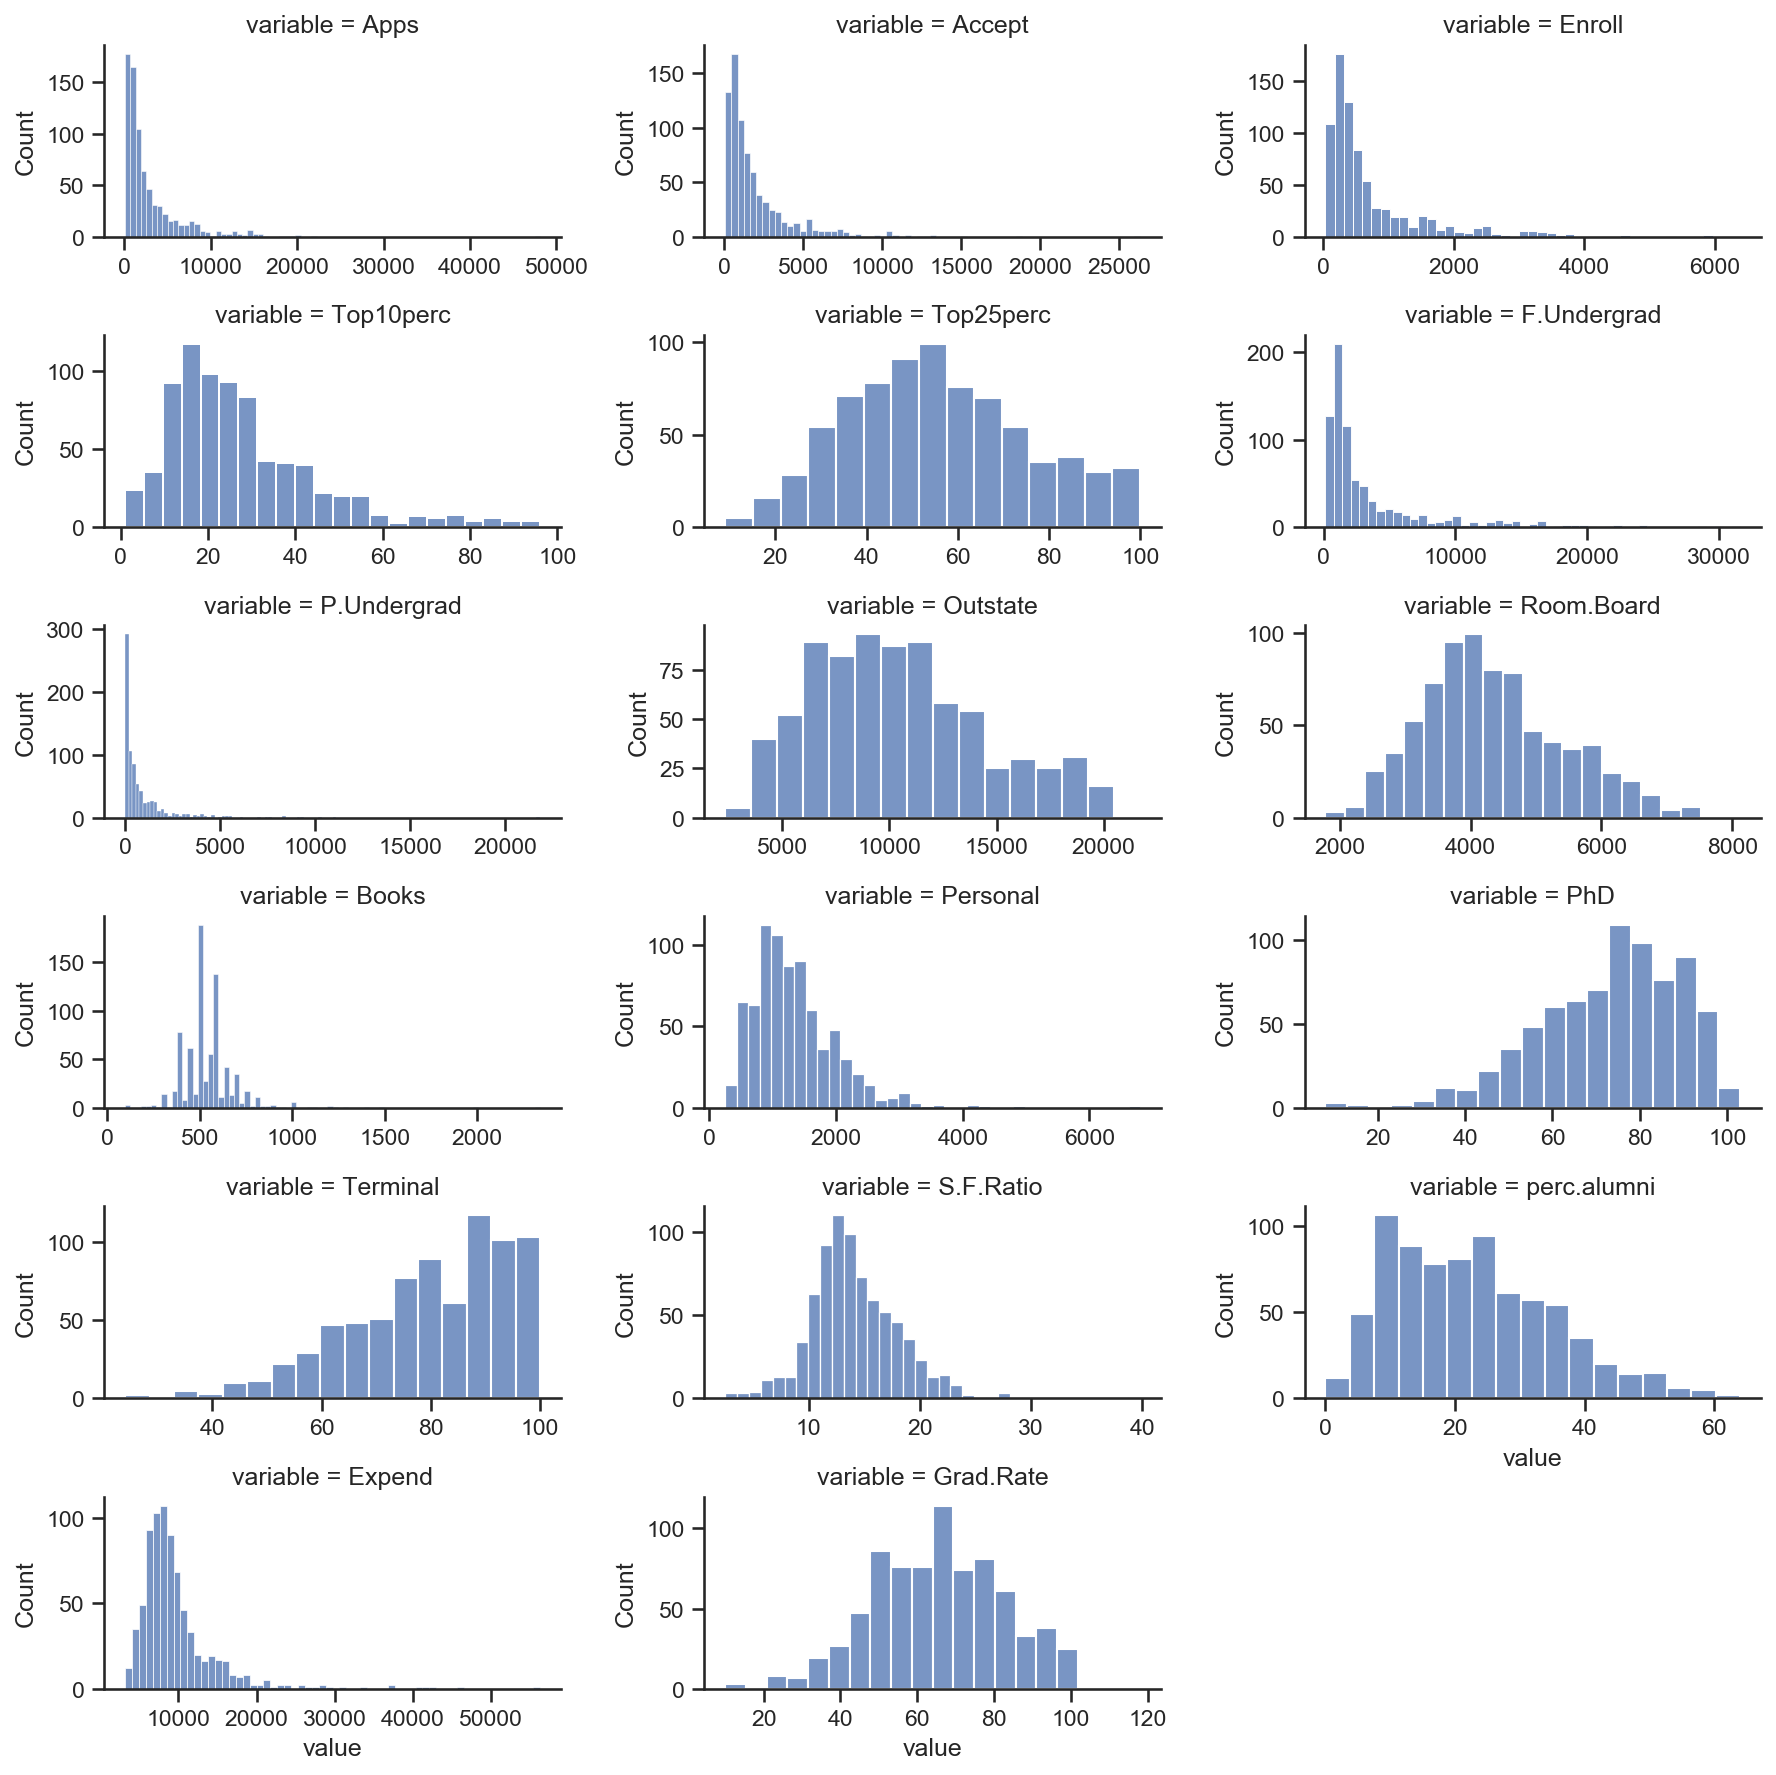

In [75]:
tmp_df = college.iloc[:, 1:-1].melt()
g = sns.FacetGrid(
    tmp_df,
    col="variable",
    col_wrap=3,
    height=2,
    aspect=2,
    sharex=False,
    sharey=False)
g.map(sns.histplot, 'value')

D:\ProgramData\Anaconda3\envs\stats\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

D:\ProgramData\Anaconda3\envs\stats\lib\site-packages\seaborn\axisgrid.py:675: UserWarning:

Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.



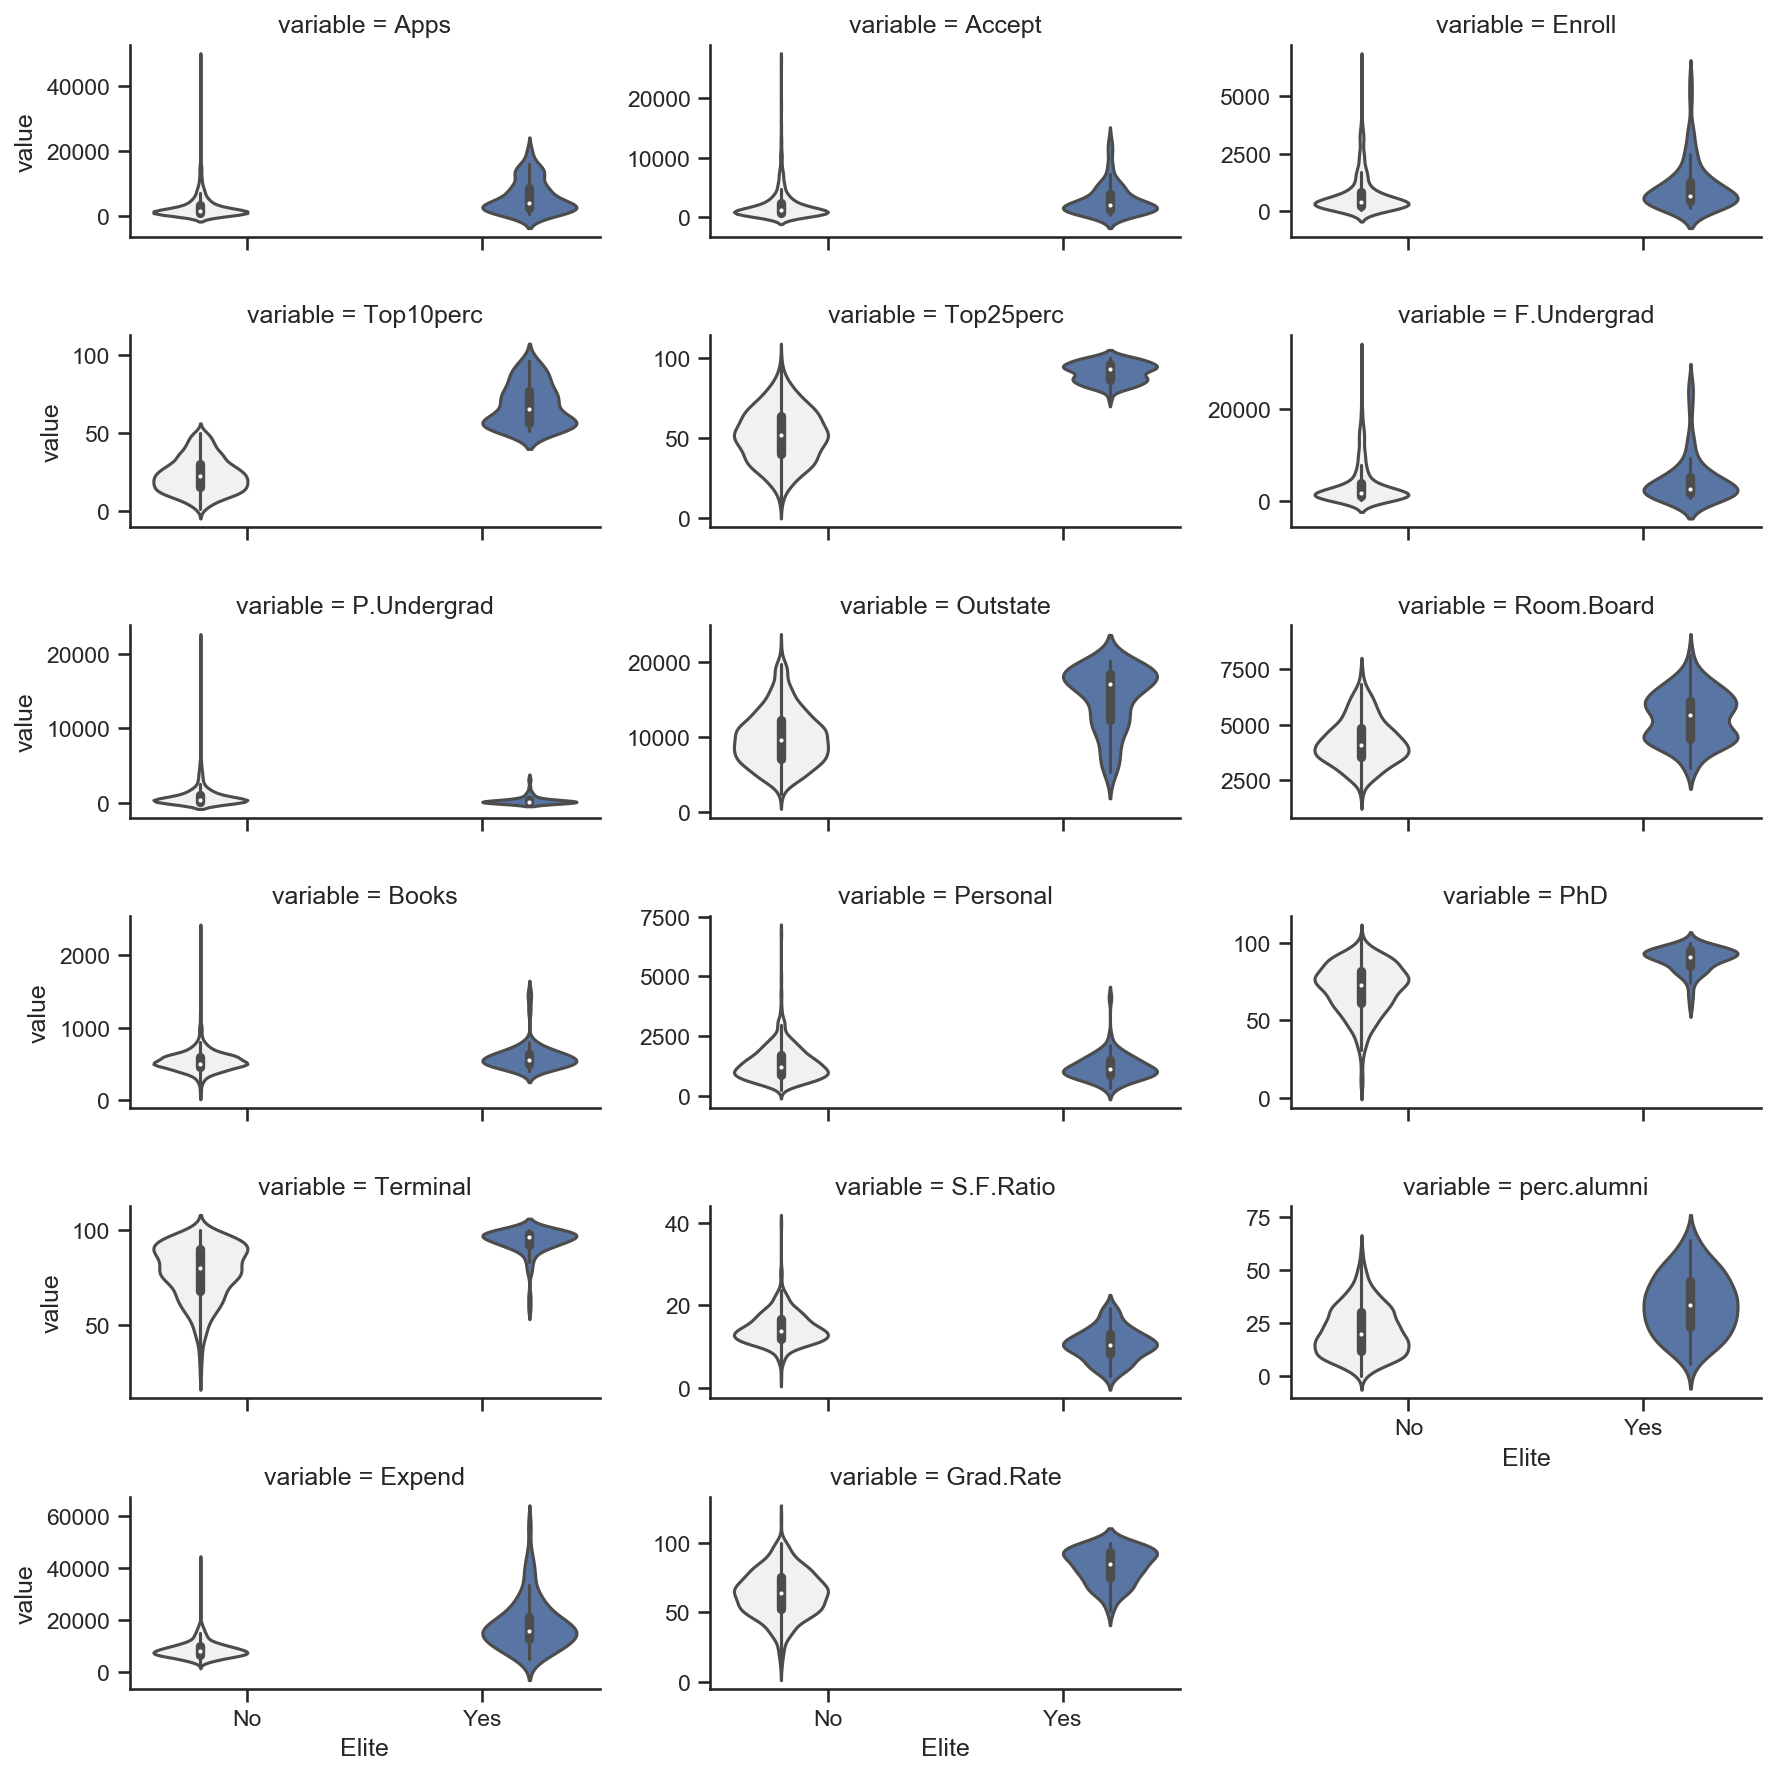

In [91]:
tmp_df = college.iloc[:, 1:].melt(id_vars="Elite")
tmp_df
g = sns.FacetGrid(
    tmp_df,
    col="variable",
    col_wrap=3,
    height=2,
    aspect=2,
    sharey=False)
g.map(sns.violinplot, "Elite", "value", "Elite")

# sns.violinplot(x="variable", y="value", hue="Elite", data=tmp_df)

vi. Continue exploring the data, and provide a brief summary of what you discover.

1. 除了Personal Spending之外，大部分变量都和最后的好坏有关。
2. **Top25perc**最为明显。